In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import math

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

path = '/Users/alex_chiang/Documents/Fin_tech/回測架構試做/data.csv'
df = pd.read_csv(path, parse_dates=True,index_col='Date')

# 假裝這些資料是基金淨值
# 不考慮交易成本！！

### 測試連續複利

In [3]:
strategy = df.pct_change(30).loc['2020-06-01'].nlargest(1).index[0]

price = df[strategy].loc['2020-06-01':]
price.shift(1)

first = np.log(price/price.shift(1)).dropna().iloc[0:30]

earning = pd.DataFrame()
earning = pd.concat([earning, first], axis=0)

In [4]:
strategy = df.pct_change(30).loc['2020-07-15'].nlargest(1).index[0]

price = df[strategy].loc['2020-07-15':]
price.shift(1)

second = np.log(price/price.shift(1)).dropna().iloc[0:30]

earning = pd.concat([earning, second], axis=0)

In [5]:
strategy = df.pct_change(30).loc['2020-08-26'].nlargest(1).index[0]

price = df[strategy].loc['2020-08-26':]
price.shift(1)

third = np.log(price/price.shift(1)).dropna().iloc[0:30]

earning = pd.concat([earning, third], axis=0)

In [6]:
earning.sum()

0    0.603676
dtype: float64

/Users/alex_chiang/opt/anaconda3/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


Start date,2020-06-02
End date,2020-10-12
Total months,4
,Backtest
Annual return,364.2%
Cumulative returns,73.0%
Annual volatility,55.4%
Sharpe ratio,3.05
Calmar ratio,13.94
Stability,0.33
Max drawdown,-26.1%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,26.12,2020-08-04,2020-08-31,2020-10-07,47
1,9.61,2020-07-08,2020-07-16,2020-07-23,12
2,6.82,2020-07-27,2020-07-28,2020-08-04,7
3,2.62,2020-06-24,2020-06-29,2020-07-03,8
4,1.51,2020-06-10,2020-06-12,2020-06-16,5


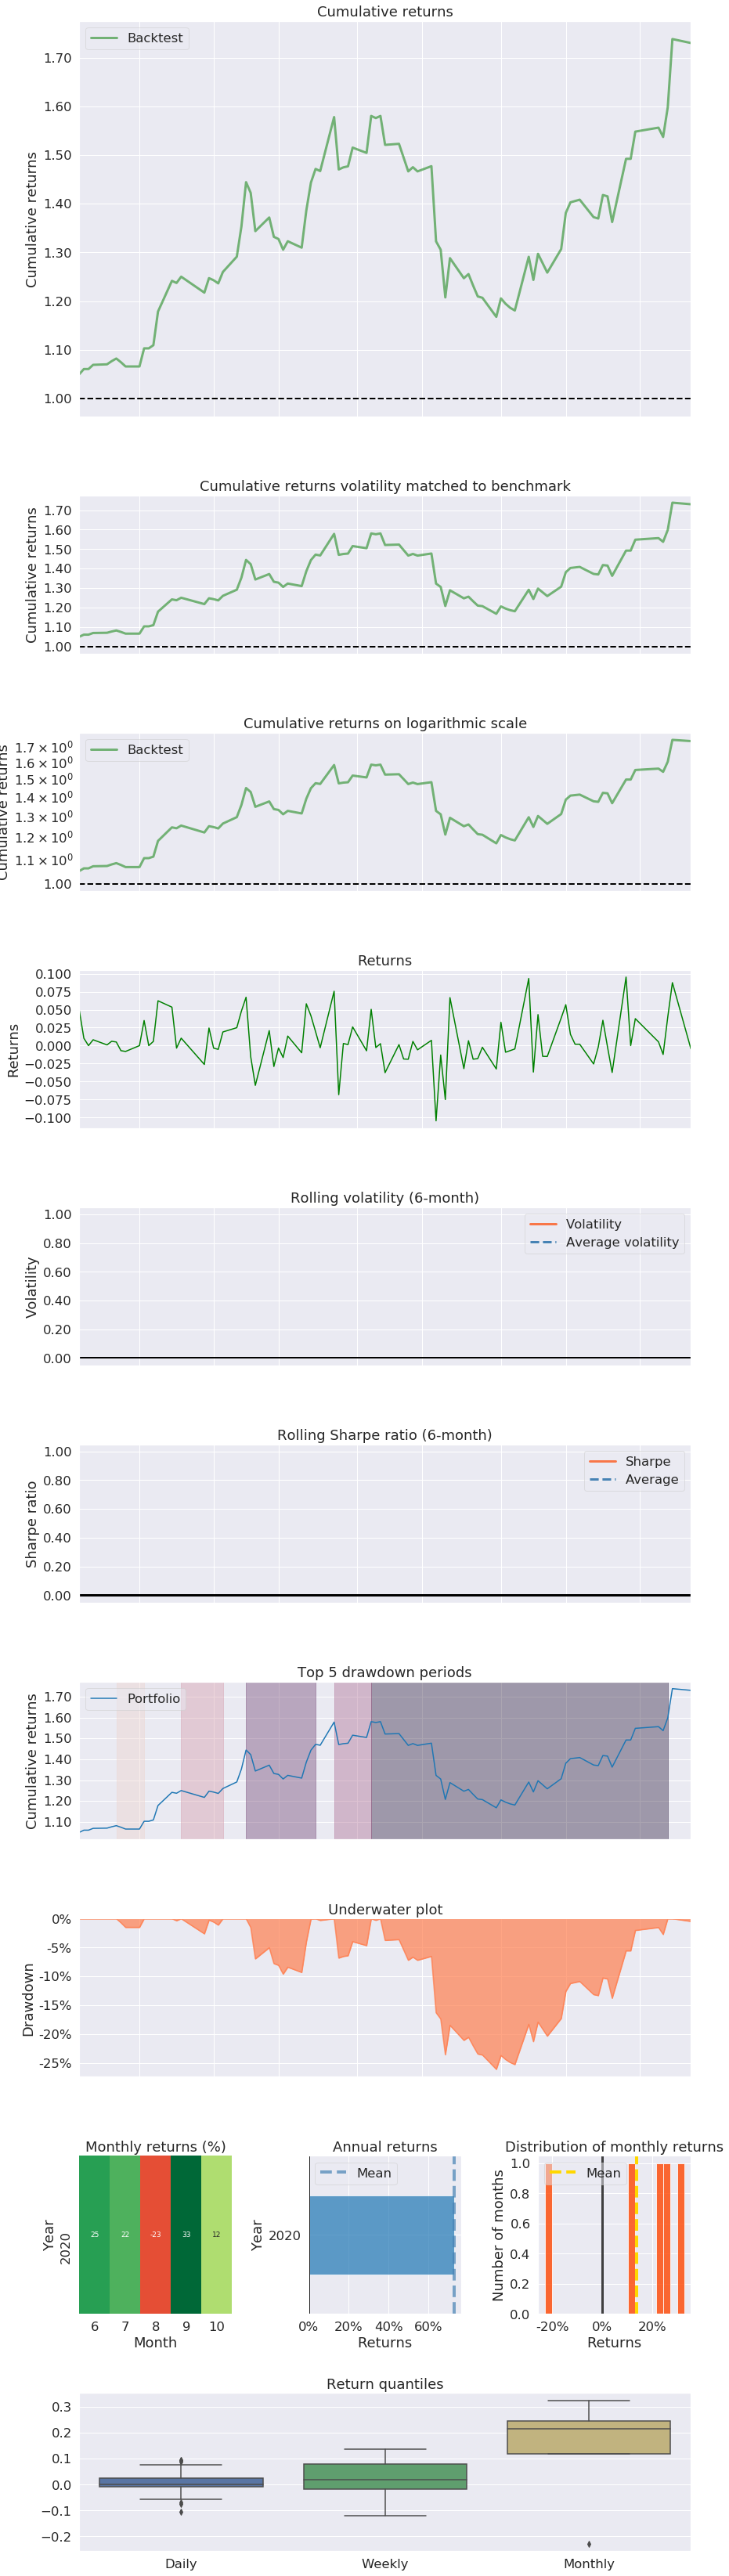

In [7]:
import pyfolio as pf
%matplotlib inline

pf.create_returns_tear_sheet(earning.squeeze())

### 測試每日複利

In [8]:
strategy = df.pct_change(30).loc['2020-06-01'].nlargest(1).index[0]

price = df[strategy].loc['2020-06-01':]
price.shift(1)

first = ((price/price.shift(1))-1).iloc[0:30]

earning = pd.DataFrame()
earning = pd.concat([earning, first], axis=0)

In [9]:
strategy = df.pct_change(30).loc['2020-07-15'].nlargest(1).index[0]

price = df[strategy].loc['2020-07-15':]
price.shift(1)

second = ((price/price.shift(1))-1).iloc[0:30]

earning = pd.concat([earning, second], axis=0)

In [10]:
strategy = df.pct_change(30).loc['2020-08-26'].nlargest(1).index[0]

price = df[strategy].loc['2020-08-26':]
price.shift(1)

third = ((price/price.shift(1))-1).iloc[0:30]

earning = pd.concat([earning, third], axis=0)

In [11]:
earning.sum()

0    0.686941
dtype: float64

Start date,2020-06-01
End date,2020-10-08
Total months,4
,Backtest
Annual return,484.4%
Cumulative returns,87.9%
Annual volatility,56.7%
Sharpe ratio,3.51
Calmar ratio,20.46
Stability,0.49
Max drawdown,-23.7%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,23.68,2020-08-06,2020-08-31,2020-09-30,40
1,9.08,2020-07-08,2020-07-16,2020-07-22,11
2,6.59,2020-07-27,2020-07-28,2020-08-04,7
3,2.59,2020-06-24,2020-06-29,2020-07-03,8
4,1.50,2020-06-10,2020-06-12,2020-06-16,5


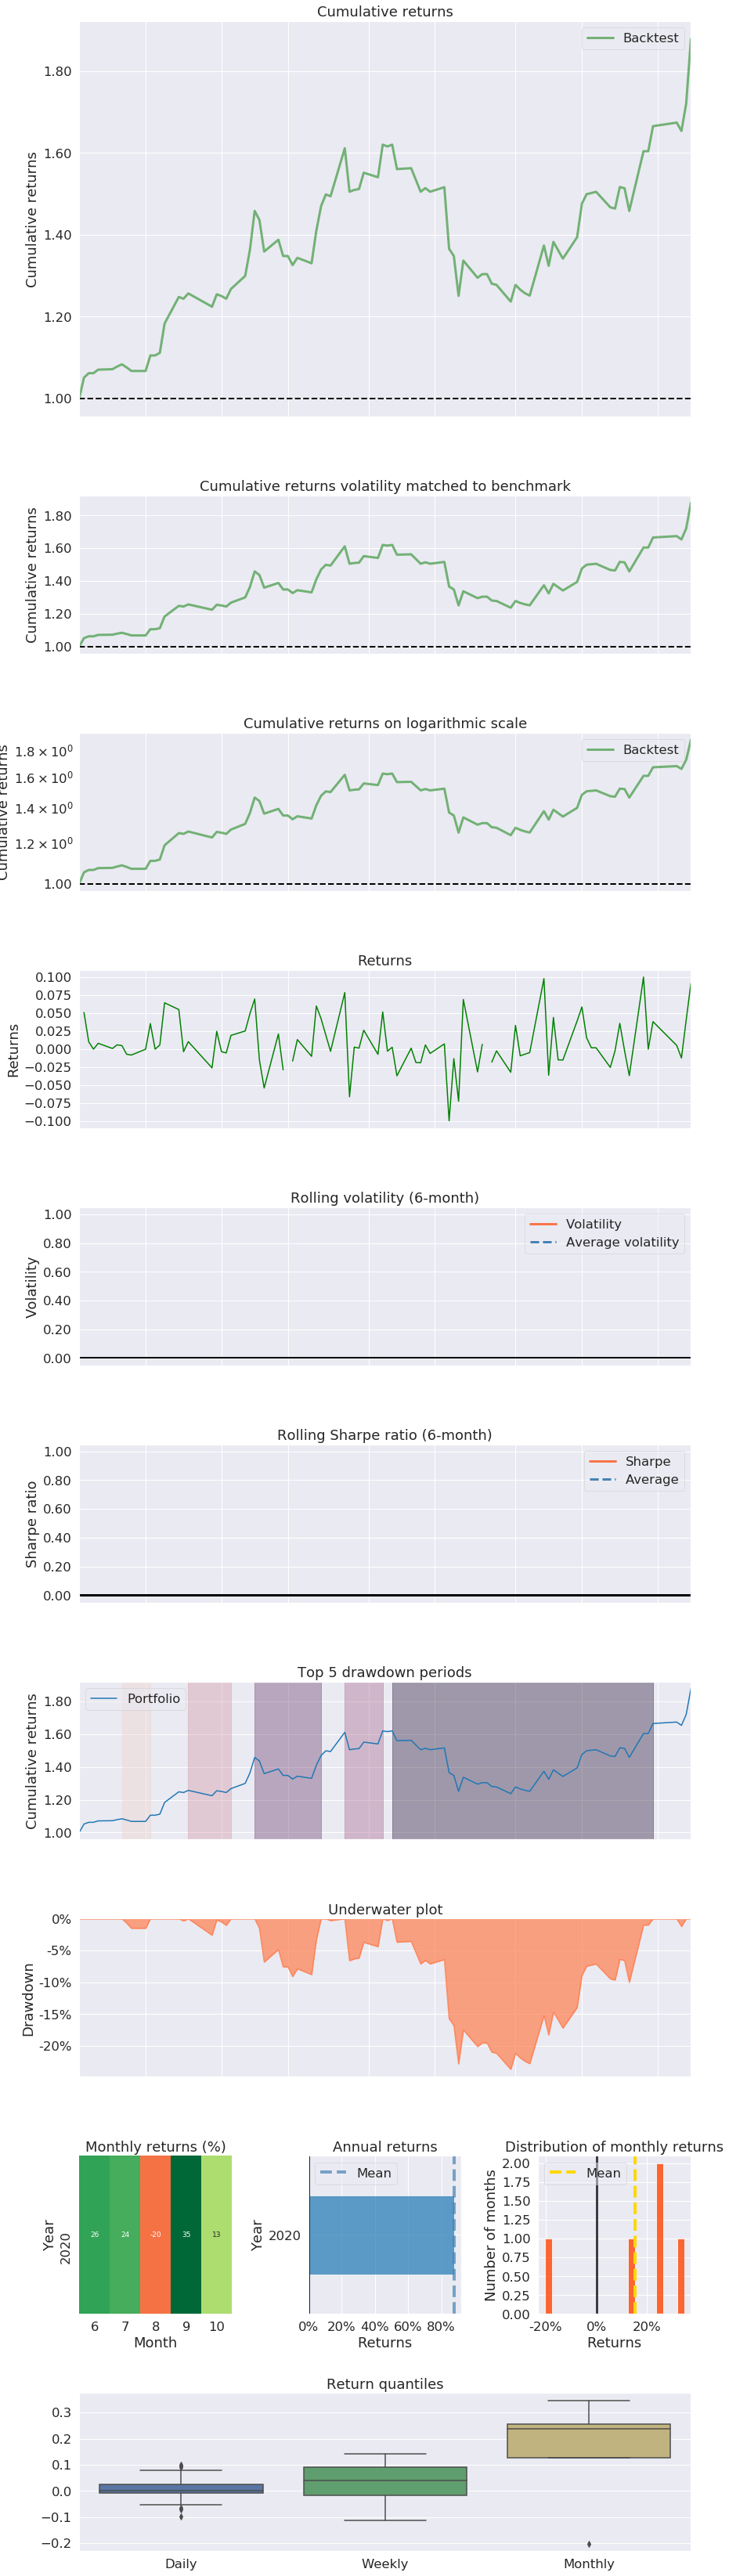

In [12]:
import pyfolio as pf
%matplotlib inline

pf.create_returns_tear_sheet(earning.squeeze())